#### Mt. SAC CISB 63 Midterm Project Fall 2023

#### Student Name: Aron Joo

This project will work with web scraping the wikipedia page for sonoluminescence (https://en.wikipedia.org/wiki/Sonoluminescence) and apply NLP Techniques (Text preprocessing, POS, NER, Translation, regex, frequency distribution, remove stopwords, lowercase, etc. wordCloud, tokenization, etc.) to preprocess the data and also do text summarization on it. The project also involves the spacy, textblob, and Gensim library's Word2Vec functionality libraries; and web scrapping and text summarization.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import requests # to get the html source code of the page
from bs4 import BeautifulSoup # to parse the html source code
import re # to use regular expressions
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem import PorterStemmer # to stem words to their root form (Example: running -> run)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re


### Download nltk data

In [2]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Fetch and Parse HTML

In [3]:
url = "https://en.wikipedia.org/wiki/Sonoluminescence"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')


In [4]:
#get the title
title = soup.title
print(title)


<title>Sonoluminescence - Wikipedia</title>


### Extract data

In [5]:
# Example: Extracting all paragraphs
paragraphs = soup.find_all('p')
# Extracting text from each paragraph
paragraph_texts = [paragraph.get_text() for paragraph in paragraphs]


### Text Preprocessing

In [6]:
# Convert to lowercase
lowercase_text = [text.lower() for text in paragraph_texts]

# Remove special characters using regex
cleaned_text = [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in lowercase_text]

# Tokenization
tokenized_text = [word_tokenize(text) for text in cleaned_text]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

# Stemming, shows stem of the word
#stemmer = PorterStemmer()
#stemmed_text = [[stemmer.stem(word) for word in tokens] for tokens in filtered_text]


In [7]:
# Remove empty tokens
#final_text = [[word for word in tokens if word.strip()] for tokens in stemmed_text]
final_text = [[word for word in tokens if word.strip()] for tokens in filtered_text]

# Convert tokens back to sentences
sentences = [' '.join(tokens) for tokens in final_text]


In [8]:
# Convert sentences back to paragraphs
processed_paragraphs = '\n\n'.join(sentences)


### Save the Process

In [9]:
with open('processed_text.txt', 'w', encoding='utf-8') as file:
    file.write(processed_paragraphs)
    
print(processed_paragraphs)


sonoluminescence emission light imploding bubbles liquid excited sound

sonoluminescence first discovered 1934 university cologne occurs sound wave sufficient intensity induces gaseous cavity within liquid collapse quickly emitting burst light phenomenon observed stable singlebubble sonoluminescence sbsl multibubble sonoluminescence mbsl 1960 peter jarman proposed sonoluminescence thermal origin might arise microshocks within collapsing cavities later experiments revealed temperature inside bubble sbsl could reach 12000 kelvins exact mechanism behind sonoluminescence remains unknown various hypotheses including hotspot bremsstrahlung collisioninduced radiation researchers even speculated temperatures sonoluminescing systems could reach millions kelvins potentially causing thermonuclear fusion however idea met skepticism researchers1 phenomenon also observed nature pistol shrimp first known instance animal producing light sonoluminescence

sonoluminescence effect first discovered univer

In [10]:
# Split the text into sentences keeping the original format
original_sentences = processed_paragraphs.strip().split('.')

# Now 'original_sentences' is an array of text
print(original_sentences)


['sonoluminescence emission light imploding bubbles liquid excited sound\n\nsonoluminescence first discovered 1934 university cologne occurs sound wave sufficient intensity induces gaseous cavity within liquid collapse quickly emitting burst light phenomenon observed stable singlebubble sonoluminescence sbsl multibubble sonoluminescence mbsl 1960 peter jarman proposed sonoluminescence thermal origin might arise microshocks within collapsing cavities later experiments revealed temperature inside bubble sbsl could reach 12000 kelvins exact mechanism behind sonoluminescence remains unknown various hypotheses including hotspot bremsstrahlung collisioninduced radiation researchers even speculated temperatures sonoluminescing systems could reach millions kelvins potentially causing thermonuclear fusion however idea met skepticism researchers1 phenomenon also observed nature pistol shrimp first known instance animal producing light sonoluminescence\n\nsonoluminescence effect first discovered 

The function takes a string of text as input and performs several text preprocessing steps on that input text

In [11]:
def preprocess_text(text):
    #This step tokenizes the text, separating it into words based on spaces and punctuation.
    words = word_tokenize(text)
    #for word in words if word.isalnum():It filters out words that are not composed entirely of alphabetical characters
    words = [word.lower() for word in words if word.isalnum()]
    #This line removes common stop words from the list of words
    words = [word for word in words if word not in stop_words]
    #The preprocessed words are joined back into a single string with spaces between them
    return ' '.join(words)


In [12]:
#cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)

def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)


In [13]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)
    

In [14]:
print(sentences)


['sonoluminescence emission light imploding bubbles liquid excited sound', 'sonoluminescence first discovered 1934 university cologne occurs sound wave sufficient intensity induces gaseous cavity within liquid collapse quickly emitting burst light phenomenon observed stable singlebubble sonoluminescence sbsl multibubble sonoluminescence mbsl 1960 peter jarman proposed sonoluminescence thermal origin might arise microshocks within collapsing cavities later experiments revealed temperature inside bubble sbsl could reach 12000 kelvins exact mechanism behind sonoluminescence remains unknown various hypotheses including hotspot bremsstrahlung collisioninduced radiation researchers even speculated temperatures sonoluminescing systems could reach millions kelvins potentially causing thermonuclear fusion however idea met skepticism researchers1 phenomenon also observed nature pistol shrimp first known instance animal producing light sonoluminescence', 'sonoluminescence effect first discovered 

In [15]:
len(sentences)


21

In [16]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)


In [17]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-7:]


In [18]:
top_sentence_indices


matrix([[12],
        [16],
        [ 4],
        [13],
        [10],
        [ 1],
        [20]], dtype=int64)

In [19]:
sentences[4]


'1990 experimental advance reported gaitan crum produced stable singlebubble sonoluminescence sbsl5 singlebubble sonoluminescence single bubble trapped acoustic standing wave emits pulse light compression bubble within standing wave technique allowed systematic study phenomenon isolated complex effects one stable predictable bubble realized temperature inside bubble hot enough melt steel seen experiment done 2012 temperature inside bubble collapsed reached 12000 kelvins6 interest sonoluminescence renewed inner temperature bubble well one million kelvins postulated7 temperature thus far conclusively proven rather recent experiments indicate temperatures around 20000 k 19700 c 35500 f8'

In [20]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    #top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)
    

sonoluminescence emission light imploding bubbles liquid excited sound.
sonoluminescence first discovered 1934 university cologne occurs sound wave sufficient intensity induces gaseous cavity within liquid collapse quickly emitting burst light phenomenon observed stable singlebubble sonoluminescence sbsl multibubble sonoluminescence mbsl 1960 peter jarman proposed sonoluminescence thermal origin might arise microshocks within collapsing cavities later experiments revealed temperature inside bubble sbsl could reach 12000 kelvins exact mechanism behind sonoluminescence remains unknown various hypotheses including hotspot bremsstrahlung collisioninduced radiation researchers even speculated temperatures sonoluminescing systems could reach millions kelvins potentially causing thermonuclear fusion however idea met skepticism researchers1 phenomenon also observed nature pistol shrimp first known instance animal producing light sonoluminescence.
sonoluminescence effect first discovered univer

### Frequency Distribution, Print the 20 most common word

In [21]:
from nltk.probability import FreqDist
x = re.sub(r"&lrm;", '', str(original_sentences))
words = word_tokenize(x)
fdist = FreqDist(words)
fdist.most_common(20)


[('bubble', 34),
 ('sonoluminescence', 23),
 ('light', 18),
 ('temperatures', 12),
 ('energy', 11),
 ('wave', 8),
 ('phenomenon', 8),
 ('temperature', 8),
 ('bubbles', 7),
 ('radiation', 7),
 ('liquid', 6),
 ('within', 6),
 ('collapse', 6),
 ('kelvins', 6),
 ('fusion', 6),
 ('shrimp', 6),
 ('experimental', 6),
 ('produced', 6),
 ('pressure', 6),
 ('high', 6)]

### Get the tag of the 10 most common words

In [22]:
most_common_words = fdist.most_common(10)
# the most common words list's elements are in the form of tuple
word_features = [item[0] for item in most_common_words]
nltk.pos_tag(word_features[:10])


[('bubble', 'JJ'),
 ('sonoluminescence', 'NN'),
 ('light', 'JJ'),
 ('temperatures', 'NNS'),
 ('energy', 'NN'),
 ('wave', 'VBP'),
 ('phenomenon', 'NN'),
 ('temperature', 'NN'),
 ('bubbles', 'VBZ'),
 ('radiation', 'NN')]

#### Plot of the 20 most common words

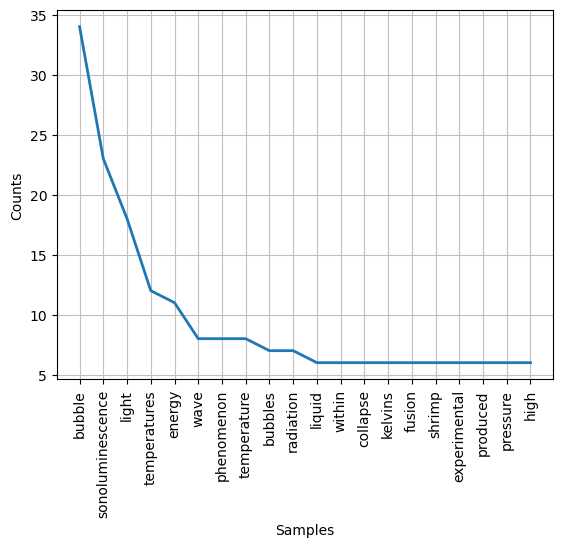

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
fdist.plot(20)


### POS-tagging and Lemmatization

In [24]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')
# Import the displaCy library
from spacy import displacy


In [25]:
doc = nlp(x)
#### Display the text, lemma, and POS for each token of the web article
for i in doc:
    print("{0} – {1} – {2}".format(i.text, i.lemma_, i.pos_))


[ – [ – X
' – ' – PUNCT
sonoluminescence – sonoluminescence – NOUN
emission – emission – NOUN
light – light – NOUN
imploding – implode – VERB
bubbles – bubble – VERB
liquid – liquid – ADJ
excited – excited – ADJ
sound\n\nsonoluminescence – sound\n\nsonoluminescence – PROPN
first – first – ADV
discovered – discover – VERB
1934 – 1934 – NUM
university – university – NOUN
cologne – cologne – NOUN
occurs – occur – VERB
sound – sound – ADJ
wave – wave – NOUN
sufficient – sufficient – ADJ
intensity – intensity – NOUN
induces – induce – VERB
gaseous – gaseous – ADJ
cavity – cavity – NOUN
within – within – ADP
liquid – liquid – ADJ
collapse – collapse – NOUN
quickly – quickly – ADV
emitting – emit – VERB
burst – burst – ADJ
light – light – ADJ
phenomenon – phenomenon – NOUN
observed – observe – VERB
stable – stable – ADJ
singlebubble – singlebubble – ADJ
sonoluminescence – sonoluminescence – NOUN
sbsl – sbsl – NOUN
multibubble – multibubble – ADJ
sonoluminescence – sonoluminescence – NOUN
mbsl

#### Using a for loop, get the Named Entities from the document

In [26]:
for entity in doc.ents:
    print(f'{entity.text}: {entity.label_}')
    

first: ORDINAL
1934: DATE
1960: DATE
peter jarman: PERSON
12000: CARDINAL
millions: CARDINAL
researchers1: PRODUCT
first: ORDINAL
first: ORDINAL
1934: DATE
peter jarman: PERSON
london: GPE
sbsl5: PERSON
acoustic: NORP
2012: CARDINAL
12000: CARDINAL
one million: CARDINAL
around 20000 k 19700: CARDINAL
35500: CARDINAL
2300: CARDINAL
5100: CARDINAL
core11: PERSON
18: CARDINAL
20000: CARDINAL
first: ORDINAL
rayleigh milton: PERSON
navierstokes: ORG
bubble12: PERSON
1: CARDINAL
2040: CARDINAL
one hundred: CARDINAL
light14: PERSON
argon: ORG
10000: DATE
160picosecond: CARDINAL
15: CARDINAL
100: CARDINAL
one: CARDINAL
julian schwinger16: PERSON
quantum: ORG
explanation18: ORG
20000: CARDINAL
millions: CARDINAL
kelvins20: ORG
2002 2005: DATE
27 2006: DATE
80: CARDINAL
4 cm: QUANTITY
60 miles per hour: QUANTITY
97: CARDINAL
kmh: ORG
218: CARDINAL
first: ORDINAL
200126: CARDINAL
impact27: LOC
3d: CARDINAL
five: CARDINAL
fashion28: PERSON
shrimp29: PERSON


In [27]:
#How many words are there? :
print (len(words))


1128


### Adding WordCloud

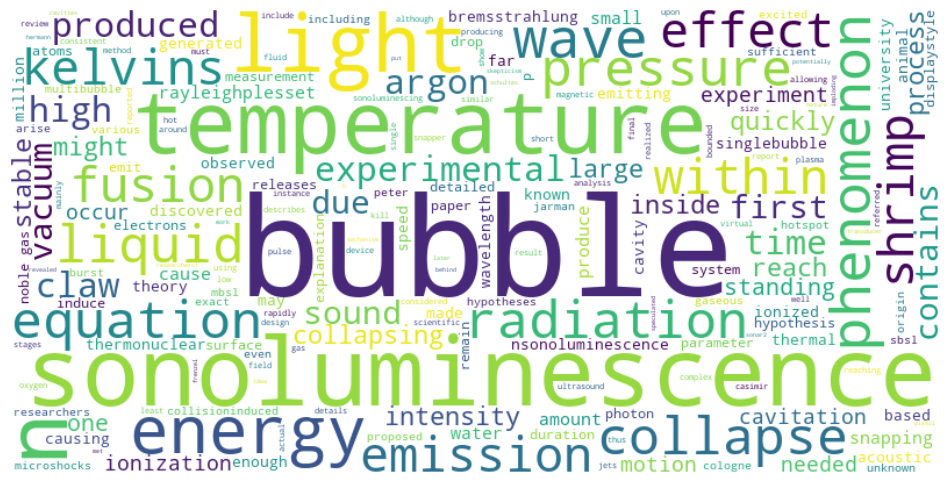

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(x)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


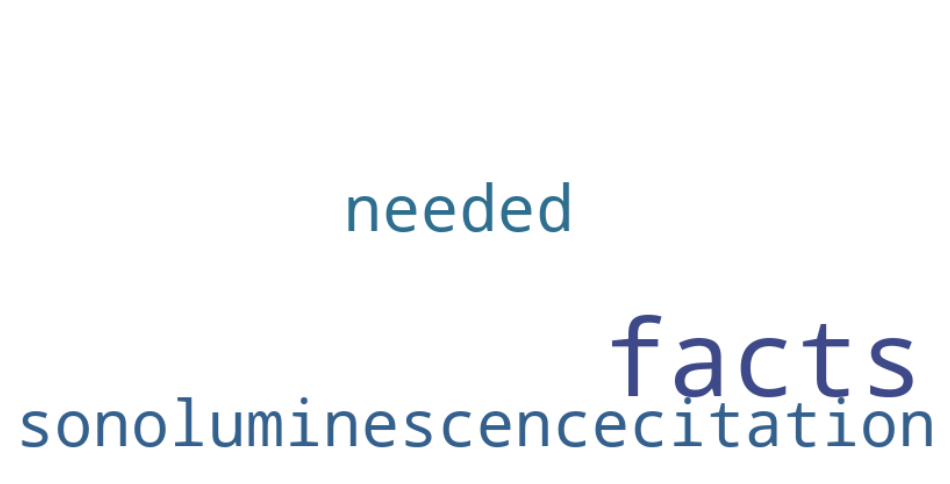

In [30]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary)

# Display the word cloud using matplotlib
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Translation

In [31]:
from textblob import TextBlob


In [32]:
# Create a TextBlob object with the text
blob = TextBlob(x)

# Translate the text to Japanese
translated_blob = blob.translate(from_lang='en', to='ja')

# Print the translated text
print(translated_blob)


['ソノルミネッセンス放射光泡の崩壊液体励起音\ n \ nsonoluminescenceが最初に発見された1934年に発見された大学ケルンは、液体崩壊内で十分な強度を発見するサウンド波が発見されます。崩壊した空洞内のマイクロショックが発生する可能性がある後の実験では、バブルSBSL内の温度が12000ケルビンに達する可能性があることが明らかになりましたsonoluminescenceの背後にある正確なメカニズムは不明でした。また、自然ピストルエビの最初の既知のインスタンス動物生産軽いソノルミネッセンス\ n \ nsonoluminescence効果最初に発見された大学ケルン1934年結果Sonar2 Hermann Frenzel H Schultes Poot Ultrasound Transducer Tandducer Photoge Developid Fulidは代わりに速度開発プロセスを期待しています。ライト超音波がオン3に変わった3困難な分析効果初期実験複雑な環境多数の短命の泡現象紹介マルチバブブルソノルミネセンスMBSL \ n \ n1960ピータージャーマンインペリアルロンドンは信頼できる理論ソノルミネセンス現象を提案しましたソノルミセンスの結論基本的には、おそらく熱ミクロッツコラップスcollapsing collapsing collapsion前進報告報告されたGaitan Crumは、安定したシングルバッブルソノルミネンスSBSL5シングルバブルソノルミネンスシングルバブルトラップアコースティックスタンディングウェーブエミットパルス光圧縮バブルを発生させます標準波のテクニックを許可する系統的研究現象隔離複合体効果1つの安定した予測可能なバブル実現温度内部バブル崩壊は12000 Kelvins6の関心のある12000 KELVINS6の関心SONOLUMINESCENCEREED INRENTERMESTEREDINGREMINS SONOLVINSCENSCERENG SONOLVINS SENGED INRENTERMINS BUBBLEを仮定していると仮定したことがあります。キャビティは既存の存在するバブルを取ることができます既存のバブルが生成される可能性のあるプロセス既知のキャビテーションソノルミネセンス研究所は安定した単一の

In [33]:
#Translate the text to Hebrew
print(blob.translate(from_lang='en', to='he'))


['פליטת סונולומינצנציה אור נופלת בועות נוזלים צליל נרגש \ n \ nsonoluminescence שהתגלה לראשונה 1934 קלן אוניברסיטאי מתרחש גל צליל עוצמה מספקת מעוררת חלל גזי בתוך התמוטטות נוזלית במהירות הפולטת פנומנצנציה נצפתה בנוזל עלול להתעורר מיקרו -גושים בתוך חללים מתמוטטים ניסויים מאוחרים יותר, שחשפו כי טמפרטורה בתוך הבועה SBSL יכולה להגיע ל 12000 קלווינס מנגנון מדויק מאחורי סונולומינסקנציה נותרה לא ידועה השערות שונות, כולל נקודה חמה של ברמסטסטראונג התנגשות החוקרים, אפילו טמפרטורות משפיעות על מערכות סונולומינות יכולות להגיע למילוני חקלאות של מיליוני טמונומטוס. כמו כן, נצפה אקדח אקדח שרימפס ידוע לראשונה חיה המייצרת סונולומינסקנציה קלה \ n \ nsonoluminescence אפקט גילה לראשונה קלן אוניברסיטאי 1934 תוצאה עבודה סונאר 2 הרמן תזז אולטראסאונד קל הפך את ה- ON3 קשה לנתח אפקט ניסויים מוקדמים סביבה מורכבת מספר גדול מספר בועות בועות תופעה הפנה סונולומינצנטיות רב -מכונית MBSL \ n \ N1960 Peter Jarman College College London, הציע תופעה של Sonolumencence instramines instrapience inspins insopiance insoments. מרא

### Visualizing the named entities (NER)

In [34]:
displacy.render(doc, style='ent', jupyter=True)


In [35]:
colors = {'PERSON': 'linear-gradient(90deg, #aa9cfc, cyan 90%)', 'ORG': 'radial-gradient(circle, yellow, rgba(220,50,70,1), indigo)'}

options = {'ents': ['PERSON', 'ORG'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)


The results of the above were interesting and I was wondering what would coming from the outputs from an article that is more scientific in nature and does not cover a topic that is more opinionated and could have more varying sentiments. For the frequency distribution I was expecting bubble and sonoluminescence to be the most common words and the output came as expected with phenomenon or action words appearing most frequently. The dropoff in reoccuring words after the 10th common word was also expected being on a scientific topic with more vocabulary. The second word cloud with the summary was unexpectedly sparse compared to other examples I've seen. The biggest flaws are the tagging outputs as core11 is not a person and bubble12 is not a person, so some incorrect results have occurred.
The textblob result with translating the web scraped text into japanese and hebrew was pretty neat. The proper nouns remained english such as Navierstokes but there was a strange string of miscellaneous words that appeared twice in the first textblob and once in the second textblob: instramines instrapience inspins insopiance insoments. Yet overall the results were more accurate than inaccurate for the spacy POS-tagging, NER, and textblobs.

### Word2vec

In [80]:
from gensim.models import Word2Vec
allreviews = sentences
allreviews = [i.split() for i in allreviews]
#creating the model
model = Word2Vec(min_count = 5)
model.build_vocab(allreviews)
model.train(allreviews, total_examples=model.corpus_count, epochs=10)


(566, 11450)

### Using the model to find the words closest to bubble

In [81]:
model.wv.most_similar('bubble')


[('fusion', 0.2356315702199936),
 ('bubbles', 0.22844450175762177),
 ('first', 0.21318243443965912),
 ('due', 0.19921204447746277),
 ('emission', 0.1557082235813141),
 ('temperature', 0.15229837596416473),
 ('liquid', 0.14269143342971802),
 ('time', 0.12926413118839264),
 ('pressure', 0.1236698105931282),
 ('high', 0.11251161247491837)]

### Using the model to find the words closest to light

In [82]:
model.wv.most_similar('light')


[('emission', 0.2676697075366974),
 ('radiation', 0.22750303149223328),
 ('energy', 0.21416795253753662),
 ('experimental', 0.20917779207229614),
 ('sound', 0.20287980139255524),
 ('pressure', 0.19477877020835876),
 ('phenomenon', 0.19260840117931366),
 ('liquid', 0.11911231279373169),
 ('wave', 0.11480674892663956),
 ('time', 0.10094567388296127)]

### Using the model to find the words closest to phenomenon

In [83]:
model.wv.most_similar('phenomenon')


[('first', 0.31279322504997253),
 ('effect', 0.19695454835891724),
 ('light', 0.19260843098163605),
 ('gas', 0.18115398287773132),
 ('fusion', 0.17644302546977997),
 ('produced', 0.15238812565803528),
 ('high', 0.1199817880988121),
 ('experimental', 0.09301751852035522),
 ('equation', 0.07352308928966522),
 ('sound', 0.06747136265039444)]

The entymology of sonoluminescence has sono coming from the Latin sonus (“sound”) and the lumin coming from the Latin lumen (“light, an opening”). So the light/lumen shows good close words for it like emission, radiation, and wave. Since the definition of sonoluminescence can have the three words included: it is the phenomenon where light is emitted from imploding bubbles caused by the pressure of sound waves, the three words have overlapping closest words using Word2vec as I expected.

### Sentiment Analysis using Transformers

I am curious what kind of sentiment analysis will be output from the scientific topic. One might expect a close neutral value near 0.5, but with words like pressure, shortlived, collapse, or implosion that are used often with negative sentiment in nonscientific contexts in interpersonal dialogues, I am predicting a value under 0.5 but still a close neutral. Perhaps a value between 0.4 and 0.5.

In [30]:
from tensorflow import keras
import pickle
import transformers
import logging
from transformers import pipeline
from logging.handlers import QueueHandler


from transformers import pipeline
classifier = pipeline("sentiment-analysis")
#data = ["I love you", "I hate you"]
classifier("This restaurant is awesome")


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
cannot import name 'expand_1d' from 'transformers.tf_utils' (C:\Users\Aron\anaconda3\Lib\site-packages\transformers\tf_utils.py)

^ Unfortunately installing, uninstalling, upgrading transformers and tensorflow couldn't alleviate the keras.engine no found error even with different forums. People on https://github.com/huggingface/transformers/issues/23352 facing error with the package too.